# RFID

A RFID system based on Dynamic Frame ALOHA is composed of N=4 tags

#### 1. Find the overall collision resolution efficiency η in the different cases in which the initial frame size is set to r1=1,2,3,4,5,6
- Assume that after the first frame, the frame size is correctly set to the current backlog size
- Assume as given the duration of the arbitration period with N=2,3 tags when r=N (L2=4, L3=51/8)

In [4]:
import math

# Number of tags to resolve
N = 4

L = dict()
# Given
L[1] = 1
L[2] = 4
L[3] = 51/8

Ps = dict()
# Probabilities with size 1
Ps[(0,1)] = 1
Ps[(1,1)] = 0
Ps[(2,1)] = 0
Ps[(3,1)] = 0
Ps[(4,1)] = 0

# Probabilities with size 2
Ps[(0,2)] = pow(1/2, 4) * (2 + math.comb(4, 2))
Ps[(1,2)] = pow(1/2, 4) * 4 * 2
Ps[(2,2)] = 0
Ps[(3,2)] = 0
Ps[(4,2)] = 0

# Probabilities with size 3
Ps[(0,3)] = pow(1/3, 4) * (3 + math.comb(4, 2) * math.factorial(3) / 2)
Ps[(1,3)] = pow(1/3, 4) * 4 * math.factorial(3)
Ps[(2,3)] = pow(1/3, 4) * math.comb(4, 2) * math.factorial(3)
Ps[(3,3)] = 0
Ps[(4,3)] = 0

# Probabilities with size 4
Ps[(0,4)] = pow(1/4, 4) * (4 + math.comb(4, 2) * math.factorial(4) / 4)
Ps[(1,4)] = pow(1/4, 4) * 4 * 4 * 3
Ps[(2,4)] = pow(1/4, 4) * math.comb(4, 2) * math.factorial(4)
Ps[(3,4)] = 0
Ps[(4,4)] = pow(1/4, 4) * math.factorial(4)

# Probabilities with size 5
Ps[(0,5)] = pow(1/5, 4) * (5 + math.comb(4, 2) * math.factorial(5) / 12)
Ps[(1,5)] = pow(1/5, 4) * 4 * 5 * 4
Ps[(2,5)] = pow(1/5, 4) * math.comb(4, 2) * math.factorial(5) / 2
Ps[(3,5)] = 0
Ps[(4,5)] = pow(1/5, 4) * math.factorial(5)

# Probabilities with size 6
Ps[(0,6)] = pow(1/6, 4) * (6 + math.comb(4, 2) * math.factorial(6) / math.factorial(4) / 2)
Ps[(1,6)] = pow(1/6, 4) * 4 * 6 * 5
Ps[(2,6)] = pow(1/6, 4) * math.comb(4, 2) * math.factorial(6) / 6
Ps[(3,6)] = 0
Ps[(4,6)] = pow(1/6, 4) * math.factorial(6) / 2

# Compute L4
L[4] = (4 + Ps[(1,4)] * L[3] + Ps[(2,4)] * L[2]) / (1 - Ps[(0,4)])

# Compute L4* with all different initial frame size
n = dict()
for r1 in range(1, 7):
    L['4_star'] = r1
    for i in range(4):
        L['4_star'] += Ps[(i,r1)] * L[4 - i]
    n[r1] = N / L['4_star']
    print(f'With initial frame size {r1} we get len {L['4_star']:.3f} so {n[r1]:.3f} efficiency')


With initial frame size 1 we get len 9.824 so 0.407 efficiency
With initial frame size 2 we get len 9.600 so 0.417 efficiency
With initial frame size 3 we get len 8.954 so 0.447 efficiency
With initial frame size 4 we get len 8.824 so 0.453 efficiency
With initial frame size 5 we get len 9.038 so 0.443 efficiency
With initial frame size 6 we get len 9.466 so 0.423 efficiency


#### 2. After computing the values of the efficiency with the different frame sizes, produce a plot with values of η over r1

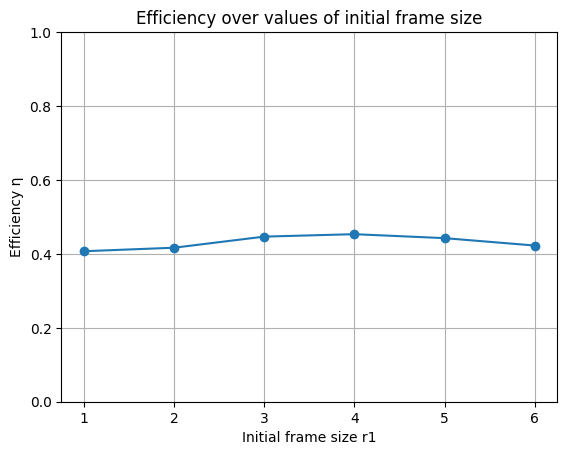

In [5]:
import matplotlib.pyplot as plt

plt.plot(n.keys(), n.values(), 'o-')
plt.grid()
plt.ylim(0, 1)
plt.xlabel('Initial frame size r1')
plt.ylabel('Efficiency η')
plt.title('Efficiency over values of initial frame size')
plt.show()

#### 3. For what values of r1 we have the maximum value for η?

In [6]:
max_r1 = max(n, key=n.get)
print(f'We obtain maximum efficiency η, equal to {n[max_r1]:.3f}, with initial frame size of {max_r1}')

We obtain maximum efficiency η, equal to 0.453, with initial frame size of 4
